## Customer Reviews Analysis for the Hotel Industry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load Data

In [2]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("hotel_data_with_revenue.csv")

In [3]:
df .head()

,Review,Rating,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue
0,nice hotel expensive parking got good deal sta...,4.0,Resort Hotel,0,342,2015,July,27,1,0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0.0
1,ok nothing special charge diamond member hilto...,2.0,Resort Hotel,0,737,2015,July,27,1,0,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0.0
2,nice rooms not 4* experience hotel monaco seat...,3.0,Resort Hotel,0,7,2015,July,27,1,0,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,75.0
3,"unique, great stay, wonderful time hotel monac...",5.0,Resort Hotel,0,13,2015,July,27,1,0,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,75.0
4,"great stay great stay, went seahawk game aweso...",5.0,Resort Hotel,0,14,2015,July,27,1,0,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,196.0


In [4]:
df.columns

Index(['Review', 'Rating', 'hotel', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'revenue'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75166 entries, 0 to 75165
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Review                          9408 non-null   object 
 1   Rating                          9408 non-null   float64
 2   hotel                           75166 non-null  object 
 3   is_canceled                     75166 non-null  int64  
 4   lead_time                       75166 non-null  int64  
 5   arrival_date_year               75166 non-null  int64  
 6   arrival_date_month              75166 non-null  object 
 7   arrival_date_week_number        75166 non-null  int64  
 8   arrival_date_day_of_month       75166 non-null  int64  
 9   stays_in_weekend_nights         75166 non-null  int64  
 10  stays_in_week_nights            75166 non-null  int64  
 11  adults                          75166 non-null  int64  
 12  children                        

In [6]:
df.isnull().sum()

Review                            65758
Rating                            65758
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             421
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0


##### Handle Missing Value

In [25]:
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

# Optional: Convert to integer
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)
# Drop rows where 'Review' or 'Rating' are missing
df = df.dropna(subset=['Review', 'Rating'])
most_common_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_common_country)
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 Review                            0
Rating                            0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                        

### Text Cleaning and Preprocessing

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Handle NaN or non-string input
    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

# Apply the function safely
df['cleaned_review'] = df['Review'].apply(clean_text)

# Optional: Preview the cleaned results
print(df[['Review', 'cleaned_review']].head())


                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      cleaned_review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms experience hotel monaco seattle goo...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


#### Sentiment Analysis

In [10]:

from textblob import TextBlob

df['sentiment_score'] = df['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
def categorize_sentiment(score):
    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'
df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment) 
print(df[['Review', 'cleaned_review', 'sentiment_score', 'sentiment']].head(5))


                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      cleaned_review  sentiment_score  \
0  nice hotel expensive parking got good deal sta...         0.208744   
1  ok nothing special charge diamond member hilto...         0.248633   
2  nice rooms experience hotel monaco seattle goo...         0.294420   
3  unique great stay wonderful time hotel monaco ...         0.504825   
4  great stay great stay went seahawk game awesom...         0.471154   

  sentiment  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  


#### Word Cloud

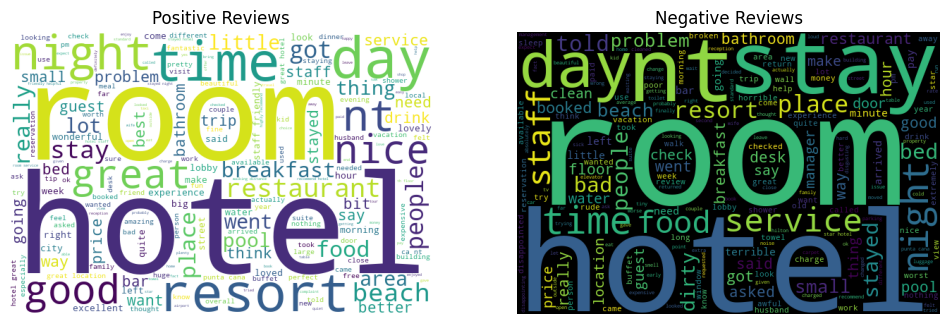

In [11]:

positive_reviews = " ".join(df[df['sentiment']=='positive']['cleaned_review'])
negative_reviews = " ".join(df[df['sentiment']=='negative']['cleaned_review'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(positive_reviews))
plt.axis('off')
plt.title("Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=600, height=400, background_color='black').generate(negative_reviews))
plt.axis('off')
plt.title("Negative Reviews")
plt.show()

#### Tokenization & Padding

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])
padded = pad_sequences(sequences, maxlen=200)

In [13]:
# 7. Encode labels
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

#### Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

#### Apply Models

##### A.Artificial Neural Network (ANN) Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense

model_ann = Sequential()
model_ann.add(Embedding(10000, 64, input_length=200))
model_ann.add(GlobalMaxPooling1D())
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(3, activation='softmax'))
model_ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model_ann.save('model_ann.h5')
loss, accuracy = model_ann.evaluate(X_test, y_test, verbose=0)
print(f"ANN Accuracy: {accuracy:.4f}")

Epoch 1/5
1880/1880 [==============================] - 43s 22ms/step - loss: 0.0474 - accuracy: 0.9915 - val_loss: 0.0170 - val_accuracy: 0.9939
Epoch 2/5
1880/1880 [==============================] - 42s 22ms/step - loss: 0.0151 - accuracy: 0.9945 - val_loss: 0.0151 - val_accuracy: 0.9943
Epoch 3/5
1880/1880 [==============================] - 41s 22ms/step - loss: 0.0105 - accuracy: 0.9961 - val_loss: 0.0152 - val_accuracy: 0.9946
Epoch 4/5
1880/1880 [==============================] - 43s 23ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0138 - val_accuracy: 0.9953
Epoch 5/5
1880/1880 [==============================] - 37s 20ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0165 - val_accuracy: 0.9953
ANN Accuracy: 0.9953


##### B.Convolutional Neural Network (CNN) Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
model_cnn = Sequential()
model_cnn.add(Embedding(10000, 64, input_length=200))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(3, activation='softmax'))
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model_cnn.save('model_cnn.h5')
loss, accuracy = model_cnn.evaluate(X_test, y_test, verbose=0)
print(f"CNN Accuracy: {accuracy:.4f}")

Epoch 1/5
1880/1880 [==============================] - 92s 48ms/step - loss: 0.0298 - accuracy: 0.9926 - val_loss: 0.0167 - val_accuracy: 0.9930
Epoch 2/5
1880/1880 [==============================] - 78s 41ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0168 - val_accuracy: 0.9951
Epoch 3/5
1880/1880 [==============================] - 82s 43ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0186 - val_accuracy: 0.9948
Epoch 4/5
1880/1880 [==============================] - 85s 45ms/step - loss: 3.6310e-04 - accuracy: 0.9999 - val_loss: 0.0245 - val_accuracy: 0.9956
Epoch 5/5
1880/1880 [==============================] - 89s 47ms/step - loss: 8.4324e-05 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 0.9953
CNN Accuracy: 0.9953


##### C.Recurrent Neural Network (RNN) Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
model_rnn = Sequential()
model_rnn.add(Embedding(10000, 64, input_length=200))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dense(3, activation='softmax'))
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model_rnn.save('model_rnn.h5')
loss, accuracy = model_rnn.evaluate(X_test, y_test, verbose=0)
print(f"RNN Accuracy: {accuracy:.4f}")

Epoch 1/5
1880/1880 [==============================] - 203s 107ms/step - loss: 0.0463 - accuracy: 0.9869 - val_loss: 0.0253 - val_accuracy: 0.9931
Epoch 2/5
1880/1880 [==============================] - 196s 104ms/step - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0317 - val_accuracy: 0.9909
Epoch 3/5
1880/1880 [==============================] - 195s 104ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0418 - val_accuracy: 0.9886
Epoch 4/5
1880/1880 [==============================] - 197s 105ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0419 - val_accuracy: 0.9925
Epoch 5/5
1880/1880 [==============================] - 196s 104ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0480 - val_accuracy: 0.9906
RNN Accuracy: 0.9906


##### D.Long Short-Term Memory (LSTM) Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense # Import LSTM here
from tensorflow.keras.callbacks import ModelCheckpoint
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 64, input_length=200))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model_lstm.save('model_lstm.h5')
loss, accuracy = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Accuracy: {accuracy:.4f}")

Epoch 1/5
1880/1880 [==============================] - 372s 196ms/step - loss: 0.0345 - accuracy: 0.9910 - val_loss: 0.0186 - val_accuracy: 0.9932
Epoch 2/5
1880/1880 [==============================] - 366s 195ms/step - loss: 0.0128 - accuracy: 0.9956 - val_loss: 0.0195 - val_accuracy: 0.9935
Epoch 3/5
1880/1880 [==============================] - 92383s 49s/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0263 - val_accuracy: 0.9935
Epoch 4/5
1880/1880 [==============================] - 359s 191ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0303 - val_accuracy: 0.9931
Epoch 5/5
1880/1880 [==============================] - 388s 206ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0378 - val_accuracy: 0.9934
LSTM Accuracy: 0.9934


##### E.Bidirectional Long Short-Term Memory (Bi-LSTM) Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
model_bilstm = Sequential()
model_bilstm.add(Embedding(10000, 64, input_length=200))
model_bilstm.add(Bidirectional(LSTM(64)))
model_bilstm.add(Dense(3, activation='softmax'))
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
model_bilstm.save('model_bilstm.h5')
loss, accuracy = model_bilstm.evaluate(X_test, y_test, verbose=0)
print(f"BiLSTM Accuracy: {accuracy:.4f}")

Epoch 1/5
1880/1880 [==============================] - 354s 184ms/step - loss: 0.0337 - accuracy: 0.9907 - val_loss: 0.0252 - val_accuracy: 0.9931
Epoch 2/5
1880/1880 [==============================] - 338s 180ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0203 - val_accuracy: 0.9935
Epoch 3/5
1880/1880 [==============================] - 346s 184ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0226 - val_accuracy: 0.9943
Epoch 4/5
1880/1880 [==============================] - 348s 185ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0267 - val_accuracy: 0.9940
Epoch 5/5
1880/1880 [==============================] - 318s 169ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0510 - val_accuracy: 0.9936
BiLSTM Accuracy: 0.9936


In [20]:
# 14. Compare Accuracy
models = {
    "ANN": model_ann,
    "CNN": model_cnn,
    "RNN": model_rnn,
    "LSTM": model_lstm,
    "BiLSTM": model_bilstm
}

for name, model in models.items():
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Accuracy: {acc:.4f}")


ANN Accuracy: 0.9953
CNN Accuracy: 0.9953
RNN Accuracy: 0.9906
LSTM Accuracy: 0.9934
BiLSTM Accuracy: 0.9936
